# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df[df.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [3]:
df.Married=df['Married'].fillna('No')

df.Dependents=df['Dependents'].fillna('0')
df.Credit_History=df['Credit_History'].fillna(0.0)
df.Self_Employed=df['Self_Employed'].fillna('No')

In [4]:
df[df.Loan_Amount_Term.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


Look at some basic statistics for numerical variables.

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [5]:
df[df.Credit_History==1.0].Credit_History.count()

475

<AxesSubplot:>

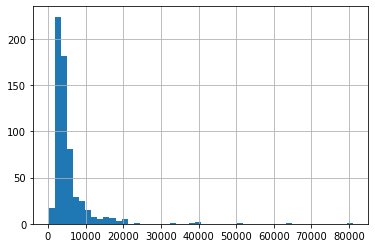

In [6]:
df.ApplicantIncome.hist(bins=50)

<AxesSubplot:>

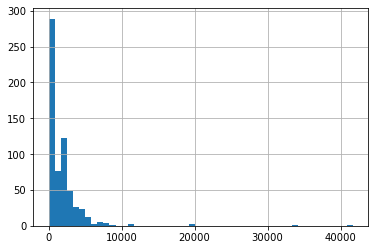

In [7]:
df.CoapplicantIncome.hist(bins=50)

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [8]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
df.Married.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [11]:
df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [12]:
df.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df.Credit_History.unique()

array([1., 0.])

In [14]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [15]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [16]:
df[df.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,0.0,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot:>

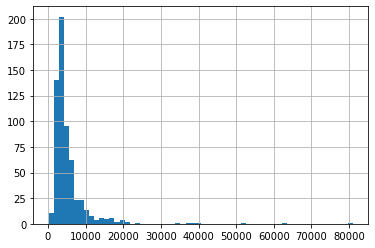

In [17]:
df.ApplicantIncome.hist(bins=60)


Look at box plots to understand the distributions. 

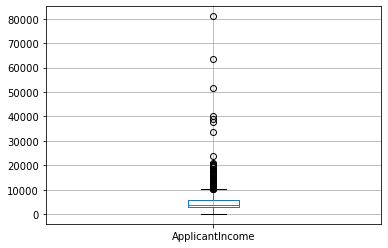

In [18]:
boxplot = df.boxplot(column=['ApplicantIncome'])

Look at the distribution of income segregated  by `Education`

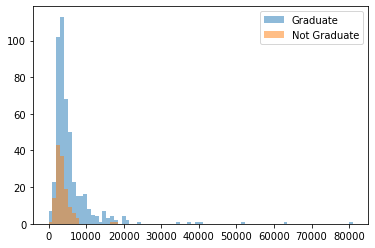

In [19]:
import random
import numpy
from matplotlib import pyplot

x = df[df.Education=='Graduate'].ApplicantIncome

y = df[df.Education=='Not Graduate'].ApplicantIncome

bins = numpy.linspace(0, 81000, 80)

pyplot.hist(x, bins, alpha=0.5, label='Graduate')
pyplot.hist(y, bins, alpha=0.5, label='Not Graduate')
pyplot.legend(loc='upper right')
pyplot.show()

Look at the histogram and boxplot of LoanAmount

In [20]:
df[df.Education=='Not Graduate'].ApplicantIncome

3      2583
6      2333
16     3596
18     4887
20     7660
       ... 
595    3833
596    6383
601    2894
605    2400
607    3987
Name: ApplicantIncome, Length: 134, dtype: int64

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [21]:
df.pivot_table(values=['LoanAmount','Loan_Amount_Term'], index=['Married' , 'Dependents'], aggfunc=np.mean)


LoanAmount  Loan_Amount_Term
Married Dependents                              
No      0           126.116279        355.005780
        1           118.500000        325.043478
        2           127.375000        360.000000
        3+          258.333333        334.285714
Yes     0           144.931429        341.897143
        1           170.236842        330.615385
        2           152.255556        339.225806
        3+          181.488372        323.720930

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [22]:
list(df.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [23]:
DF2= df.pivot_table(values=['LoanAmount','Loan_Amount_Term'], index=['Gender','Married' , 'Dependents'], aggfunc=np.mean)

DF2

LoanAmount  Loan_Amount_Term
Gender Married Dependents                              
Female No      0           111.677419        360.000000
               1           105.833333        335.076923
               2           129.000000        360.000000
               3+          302.500000        300.000000
       Yes     0           120.800000        360.000000
               1           293.666667        284.000000
               2           115.000000        384.000000
Male   No      0           134.981481        352.216216
               1           133.700000        312.000000
               2           126.833333        360.000000
               3+          217.666667        360.000000
       Yes     0           148.093333        338.880000
               1           159.333333        336.676056
               2           155.228916        336.139535
               3+          164.243902        323.414634

In [24]:
for i in range(15):
    list_of_single_L=list(df[df[['Gender','Married','Dependents']]==list(DF2.index[i])][['Gender','Married','Dependents']].dropna().index)
    list1=list(df[df.LoanAmount.isnull()].index)
    list_of_single_L_n=list(set(list1).intersection(list_of_single_L))
    new_df = pd.DataFrame({'LoanAmount': [DF2.LoanAmount[i]]}, index=list_of_single_L_n)
    df.update(new_df)

In [25]:
for i in range(15):
    list_of_single_L=list(df[df[['Gender','Married','Dependents']]==list(DF2.index[i])][['Gender','Married','Dependents']].dropna().index)
    list1=list(df[df.Loan_Amount_Term.isnull()].index)
    list_of_single_L_n=list(set(list1).intersection(list_of_single_L))
    new_df = pd.DataFrame({'Loan_Amount_Term': [DF2.Loan_Amount_Term[i]]}, index=list_of_single_L_n)
    df.update(new_df)

In [26]:
df=df.dropna()

In [27]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,134.981481,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

<AxesSubplot:>

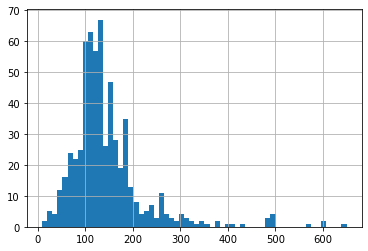

In [28]:
df.LoanAmount.hist(bins=60)

Combine both incomes as total income and take a log transformation of the same.

In [29]:
df['total_income']=df['ApplicantIncome']+df['CoapplicantIncome']

<AxesSubplot:>

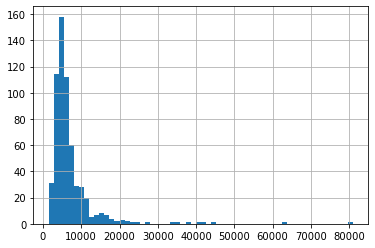

In [30]:
df.total_income.hist(bins=60)

In [31]:
# Python log transform
df.insert(len(df.columns), 'total_income_log',
         np.log(df['total_income']))

<AxesSubplot:>

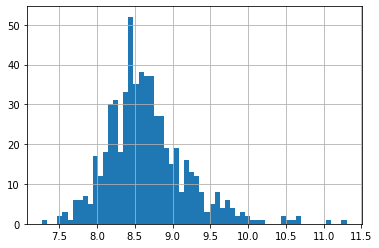

In [32]:
df.total_income_log.hist(bins=60)

In [33]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'total_income', 'total_income_log'],
      dtype='object')

In [34]:
df['Gender'] = df['Gender'].replace(['Male'],0)
df['Gender'] = df['Gender'].replace(['Female'],1)

df['Married'] = df['Married'].replace(['No','Yes'],[0,1])
df['Dependents'] = df['Dependents'].replace(['0','1','2','3+'],[0,1,2,3])
df['Education'] = df['Education'].replace(['Not Graduate','Graduate'],[0,1])
df['Self_Employed'] = df['Self_Employed'].replace(['No','Yes'],[0,1])
df['Property_Area'] = df['Property_Area'].replace(['Urban','Semiurban','Rural'],[0,1,2])
df['Loan_Status'] = df['Loan_Status'].replace(['N','Y'],[0,1])

## 4. Building a Predictive Model

In [35]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,total_income_log
0,LP001002,0,0,0,1,0,5849,0.0,134.981481,360.0,1.0,0,1,5849.0,8.674026
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0,6091.0,8.714568
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1,3000.0,8.006368
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1,4941.0,8.505323
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,1,2900.0,7.972466
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,2,1,4106.0,8.320205
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1,8312.0,9.025456
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1,7583.0,8.933664


In [36]:
y=df.Loan_Status

In [37]:
X=df.drop('Loan_Status',axis=1)

In [38]:
X=X.drop('Loan_ID',axis=1)

Try paramater grid search to improve the results

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [221]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 95,100,105, 110],
    'min_samples_leaf': [7,8,9,10],
    'min_samples_split': [ 11,12,13,14],
    'n_estimators': [ 700,750,800,810]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [222]:
# Fit the grid search to the data
grid_search.fit(X, y)
grid_search.best_params_

Fitting 4 folds for each of 448 candidates, totalling 1792 fits


{'bootstrap': True,
 'max_depth': 110,
 'min_samples_leaf': 9,
 'min_samples_split': 14,
 'n_estimators': 400}

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 70% training and 30% test
#Create a Gaussian Classifier
clf=RandomForestClassifier(bootstrap= True,
 max_depth= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 1600)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [480]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8264462809917356


In [174]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9666666666666667


In [ ]:
import pickle

In [481]:
filename = 'RF_model3.sav'
pickle.dump(clf, open(filename, 'wb'))

In [183]:
X_test[0]

array([-0.14357951,  0.3595044 ,  0.24078751,  2.02751248,  0.85089194,
        1.06458514, -0.36159928,  0.43310795, -0.7994224 ,  1.38526155,
        2.00618406, -0.30309825,  0.17879287, -0.14456682, -0.40594173,
       -0.38202545,  0.7243685 , -0.4032571 ,  0.44103291, -0.93788023])

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [151]:
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [152]:
feature_union = FeatureUnion([('pca', PCA(n_components=3)), 
                              ('select_best', SelectKBest(k=6))])
pipeline = Pipeline(steps=[('scaling', StandardScaler()),
                           ('features', feature_union),
                           ('classifier', RandomForestClassifier(n_estimators=61))])
param_grid = { 
              'features__pca__n_components': [1, 3, 5,7,9],
              'features__select_best__k': [1, 3, 6,8,9]}
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.7734806629834254
Achieved with hyperparameters: {'features__pca__n_components': 5, 'features__select_best__k': 6}


In [202]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income,total_income_log
0,0,0,0,1,0,5849,0.0,134.981481,360.0,1.0,0,5849.0,8.674026
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,6091.0,8.714568
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,3000.0,8.006368
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,4941.0,8.505323
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,2900.0,7.972466
610,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,2,4106.0,8.320205
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,8312.0,9.025456
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,7583.0,8.933664


In [198]:
len(X_test)

30

In [196]:
len(X_test[0])

20

In [186]:
data={'Gender':0, 'Married':0, 'Dependents':0, 'Education':0,
       'Self_Employed':0, 'ApplicantIncome':0, 'CoapplicantIncome':0, 'LoanAmount':0,
       'Loan_Amount_Term':0, 'Credit_History':0, 'Property_Area':0,
       'total_income':0, 'total_income_log':0}

In [190]:
np.array(list(data.values()))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [193]:
clf.predict(np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [84]:
# import Flask and jsonify
from flask import Flask, jsonify, request
# import Resource, Api and reqparser
from flask_restful import Resource, Api, reqparse
import pandas as pd
import numpy
import pickle
# import Flask and jsonify
from flask import Flask, jsonify

# import Resource, Api and reqparser
from flask_restful import Resource, Api, reqparse

In [493]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income,total_income_log
0,0,0,0,1,0,5849,0.0,134.981481,360.0,1.0,0,5849.0,8.674026
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,6091.0,8.714568
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,3000.0,8.006368
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,4941.0,8.505323
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,2900.0,7.972466
610,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,2,4106.0,8.320205
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,8312.0,9.025456
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,7583.0,8.933664


In [488]:
filename = 'RF_model3.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [498]:
loaded_model.predict(X[0:1].values)

array([1], dtype=int64)

In [499]:
X[0:1].values[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 5.84900000e+03, 0.00000000e+00, 1.34981481e+02,
       3.60000000e+02, 1.00000000e+00, 0.00000000e+00, 5.84900000e+03,
       8.67402599e+00])

In [491]:
metrics.accuracy_score(y, loaded_model.predict(X))

0.9650582362728786